# Comparative Analysis of Image Captioning Models

## Abstract

This study presents a systematic evaluation of six state-of-the-art image captioning models tested on a dataset comprising toys and children's artwork. The analysis examines performance across multiple dimensions including computational efficiency, cost-effectiveness, and caption quality.

## 1. Introduction

Image captioning represents a critical intersection of computer vision and natural language processing, with applications spanning from accessibility technologies to content management systems. This analysis evaluates the performance characteristics of contemporary image captioning models to establish evidence-based selection criteria for practical applications.

### 1.1 Dataset Overview
- **Test Dataset**: 5 images (toy_01.jpeg, drawing_04.jpeg, drawing_05.jpeg, drawing_02.jpeg, toy_07.jpeg)
- **Models Evaluated**: gemini-2.5-flash-preview, gemini-2.0-flash, gpt-4o-vision, blip, blip-2, llava-1.5-7b
- **Evaluation Metrics**: execution time, computational cost, caption quality

### 1.2 Research Objectives
1. Quantify performance differences across image captioning models
2. Analyze cost-effectiveness trade-offs
3. Establish model selection criteria for different application scenarios
4. Evaluate caption quality through multiple analytical approaches


## 2. Methodology


In [1]:
# Import required libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configure visualization parameters
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("Analysis environment initialized.")


Analysis environment initialized.


In [2]:
# Load experimental data
data_path = "../../results/image_captioning/image_captioning_results_20250605_203819.csv"
df = pd.read_csv(data_path)

print(f"Dataset dimensions: {df.shape}")
print(f"Variables: {list(df.columns)}")
print(f"\nData sample:")
df.head()


Dataset dimensions: (29, 5)
Variables: ['file_name', 'model_name', 'description', 'execution_time', 'cost']

Data sample:


,file_name,model_name,description,execution_time,cost
0,toy_01.jpeg,gemini-2.5-flash-preview,An overhead shot captures a lifelike baby doll...,5.69,0.0028
1,toy_01.jpeg,gemini-2.0-flash,"A doll with curly, blonde hair and blue eyes l...",3.17,0.0027
2,toy_01.jpeg,gpt-4o-vision,The image shows a doll with curly blond hair a...,7.07,0.0058
3,toy_01.jpeg,blip,Caption: a doll laying on a couch with her han...,4.80,0.0046
4,toy_01.jpeg,blip-2,a doll sitting on a couch,3.67,0.0060


## 3. Exploratory Data Analysis


In [3]:
# Dataset characterization
print("=== DATASET CHARACTERIZATION ===\n")

print("Models evaluated:")
for model in df['model_name'].unique():
    print(f"  - {model}")

print(f"\nTest images:")
for image in df['file_name'].unique():
    print(f"  - {image}")

print(f"\nData completeness assessment:")
expected_combinations = len(df['model_name'].unique()) * len(df['file_name'].unique())
print(f"  - Expected combinations: {len(df['model_name'].unique())} models × {len(df['file_name'].unique())} images = {expected_combinations}")
print(f"  - Actual records: {len(df)}")
print(f"  - Missing records: {expected_combinations - len(df)}")

# Data quality assessment
print(f"\nData quality assessment:")
print(df.isnull().sum())


=== DATASET CHARACTERIZATION ===

Models evaluated:
  - gemini-2.5-flash-preview
  - gemini-2.0-flash
  - gpt-4o-vision
  - blip
  - blip-2
  - llava-1.5-7b

Test images:
  - toy_01.jpeg
  - drawing_04.jpeg
  - drawing_05.jpeg
  - drawing_02.jpeg
  - toy_07.jpeg

Data completeness assessment:
  - Expected combinations: 6 models × 5 images = 30
  - Actual records: 29
  - Missing records: 1

Data quality assessment:
file_name         0
model_name        0
description       0
execution_time    0
cost              0
dtype: int64


## 4. Performance Metrics Analysis


In [4]:
# Performance statistics
print("=== PERFORMANCE METRICS ANALYSIS ===\n")

# Aggregate performance statistics by model
performance_stats = df.groupby('model_name').agg({
    'execution_time': ['mean', 'std', 'min', 'max'],
    'cost': ['mean', 'std', 'min', 'max']
}).round(4)

performance_stats.columns = ['_'.join(col) for col in performance_stats.columns]
print("Performance Statistics by Model:")
print(performance_stats)


=== PERFORMANCE METRICS ANALYSIS ===

Performance Statistics by Model:
                          execution_time_mean  execution_time_std  \
model_name                                                          
blip                                   3.3580              1.2721   
blip-2                                 2.9660              1.1337   
gemini-2.0-flash                       2.4080              1.0025   
gemini-2.5-flash-preview               4.5760              1.6469   
gpt-4o-vision                          9.1680              7.8677   
llava-1.5-7b                           4.9525              2.4541   

                          execution_time_min  execution_time_max  cost_mean  \
model_name                                                                    
blip                                    1.96                4.80     0.0046   
blip-2                                  2.00                4.61     0.0060   
gemini-2.0-flash                        1.44                

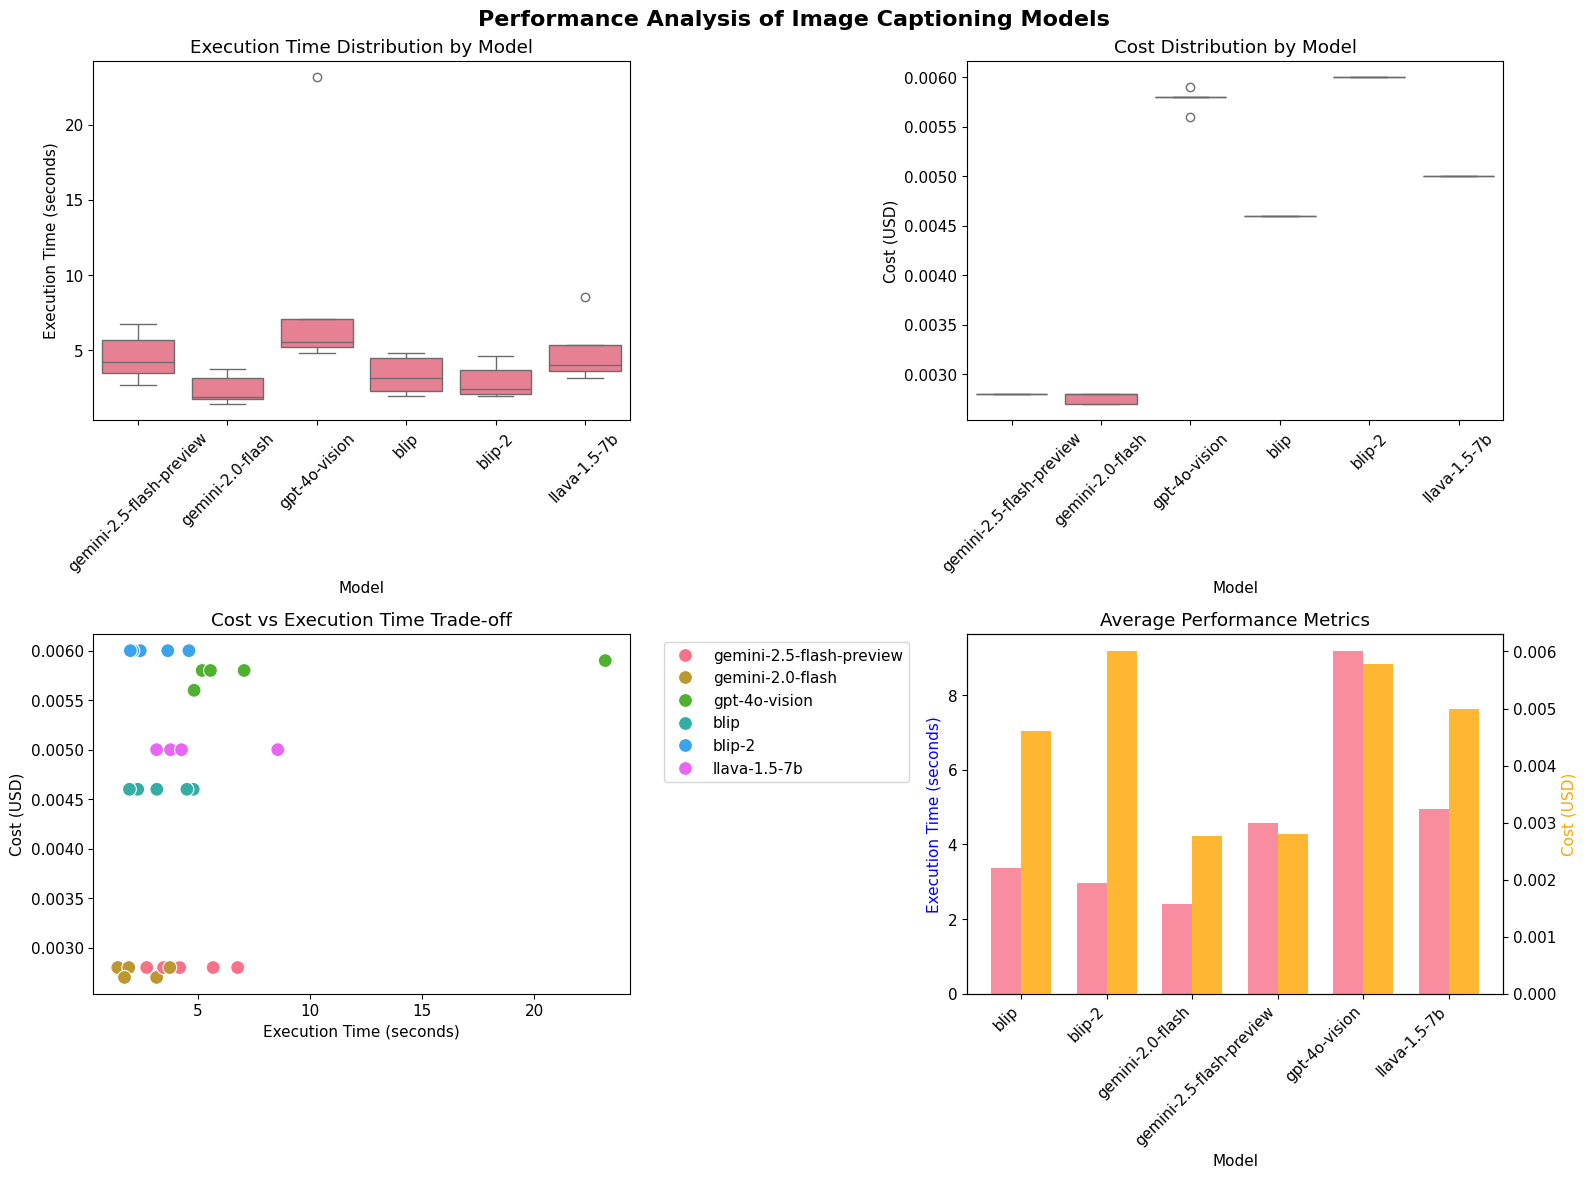

In [5]:
# Performance visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Performance Analysis of Image Captioning Models', fontsize=16, fontweight='bold')

# Execution time analysis
sns.boxplot(data=df, x='model_name', y='execution_time', ax=axes[0,0])
axes[0,0].set_title('Execution Time Distribution by Model')
axes[0,0].set_xlabel('Model')
axes[0,0].set_ylabel('Execution Time (seconds)')
axes[0,0].tick_params(axis='x', rotation=45)

# Cost analysis
sns.boxplot(data=df, x='model_name', y='cost', ax=axes[0,1])
axes[0,1].set_title('Cost Distribution by Model')
axes[0,1].set_xlabel('Model')
axes[0,1].set_ylabel('Cost (USD)')
axes[0,1].tick_params(axis='x', rotation=45)

# Cost vs execution time relationship
sns.scatterplot(data=df, x='execution_time', y='cost', hue='model_name', s=100, ax=axes[1,0])
axes[1,0].set_title('Cost vs Execution Time Trade-off')
axes[1,0].set_xlabel('Execution Time (seconds)')
axes[1,0].set_ylabel('Cost (USD)')
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Average performance comparison
avg_metrics = df.groupby('model_name')[['execution_time', 'cost']].mean().reset_index()
x_pos = np.arange(len(avg_metrics))
width = 0.35

ax2 = axes[1,1]
ax2_twin = ax2.twinx()

bars1 = ax2.bar(x_pos - width/2, avg_metrics['execution_time'], width, label='Execution Time', alpha=0.8)
bars2 = ax2_twin.bar(x_pos + width/2, avg_metrics['cost'], width, label='Cost', alpha=0.8, color='orange')

ax2.set_xlabel('Model')
ax2.set_ylabel('Execution Time (seconds)', color='blue')
ax2_twin.set_ylabel('Cost (USD)', color='orange')
ax2.set_title('Average Performance Metrics')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(avg_metrics['model_name'], rotation=45, ha='right')

plt.tight_layout()
plt.show()


## 5. Caption Quality Analysis


In [6]:
# Caption quality metrics
df['description_length'] = df['description'].str.len()
df['word_count'] = df['description'].str.split().str.len()

# Quality metrics calculation
quality_metrics = df.groupby('model_name').agg({
    'description_length': ['mean', 'std'],
    'word_count': ['mean', 'std']
}).round(2)

quality_metrics.columns = ['_'.join(col) for col in quality_metrics.columns]
print("=== CAPTION QUALITY ANALYSIS ===\n")
print("Caption Length and Word Count Statistics:")
print(quality_metrics)

# Content analysis indicators
print(f"\n=== CONTENT ANALYSIS ===\n")

# Define content quality indicators
content_indicators = {
    'color_mentions': df['description'].str.contains('color|blue|red|green|yellow|purple|orange|pink|gray|grey|brown|white|black', case=False, na=False),
    'artistic_context': df['description'].str.contains("child|children|drawing|painting|child's", case=False, na=False),
    'object_identification': df['description'].str.contains('toy|doll|lego|teddy|bear', case=False, na=False),
    'detailed_description': df['word_count'] > 20
}

for indicator, mask in content_indicators.items():
    df[indicator] = mask

content_analysis = df.groupby('model_name')[list(content_indicators.keys())].mean().round(3)
print("Content Analysis Results (proportion of captions with specific features):")
print(content_analysis)


=== CAPTION QUALITY ANALYSIS ===

Caption Length and Word Count Statistics:
                          description_length_mean  description_length_std  \
model_name                                                                  
blip                                        58.20                    7.22   
blip-2                                      23.80                    8.07   
gemini-2.0-flash                           263.40                   52.31   
gemini-2.5-flash-preview                   365.80                   34.48   
gpt-4o-vision                              314.80                   38.42   
llava-1.5-7b                               205.75                   87.97   

                          word_count_mean  word_count_std  
model_name                                                 
blip                                12.60            1.14  
blip-2                               5.40            1.34  
gemini-2.0-flash                    46.80            7.19  
gemini-

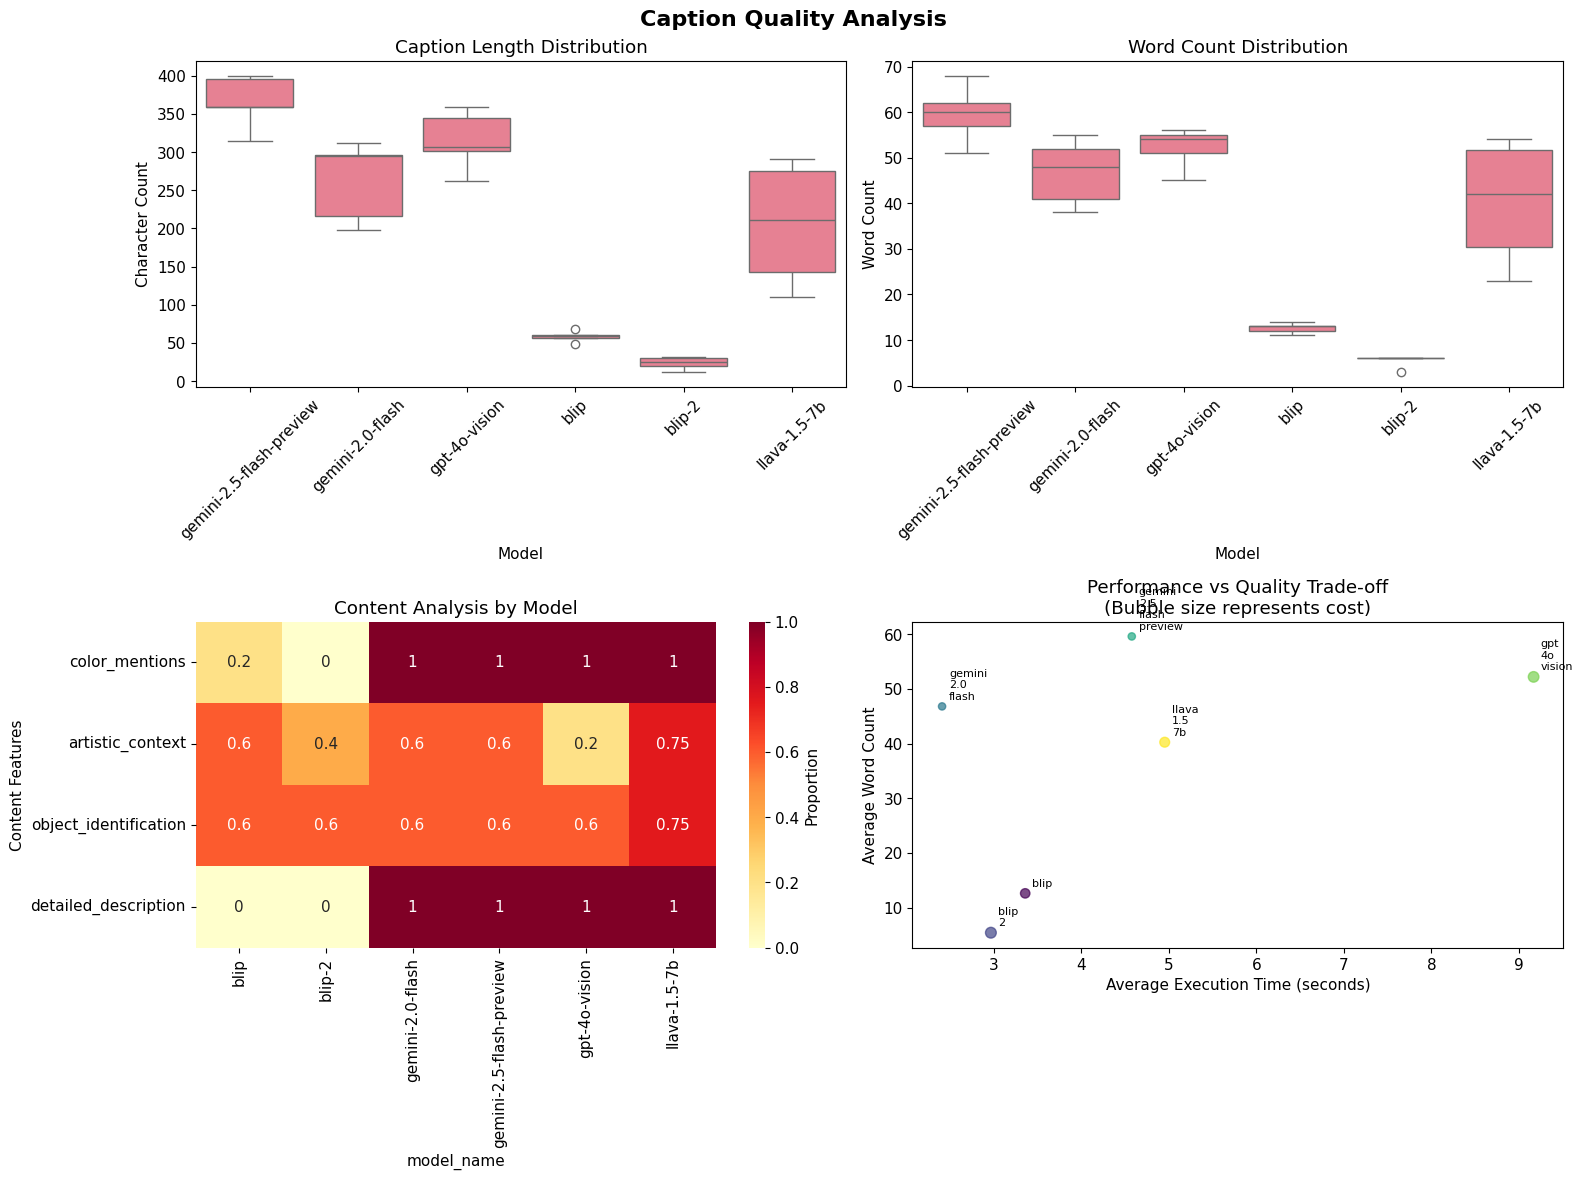

In [7]:
# Caption quality visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Caption Quality Analysis', fontsize=16, fontweight='bold')

# Description length distribution
sns.boxplot(data=df, x='model_name', y='description_length', ax=axes[0,0])
axes[0,0].set_title('Caption Length Distribution')
axes[0,0].set_xlabel('Model')
axes[0,0].set_ylabel('Character Count')
axes[0,0].tick_params(axis='x', rotation=45)

# Word count distribution
sns.boxplot(data=df, x='model_name', y='word_count', ax=axes[0,1])
axes[0,1].set_title('Word Count Distribution')
axes[0,1].set_xlabel('Model')
axes[0,1].set_ylabel('Word Count')
axes[0,1].tick_params(axis='x', rotation=45)

# Content richness heatmap
content_data = content_analysis.T
sns.heatmap(content_data, annot=True, cmap='YlOrRd', ax=axes[1,0], cbar_kws={'label': 'Proportion'})
axes[1,0].set_title('Content Analysis by Model')
axes[1,0].set_ylabel('Content Features')

# Performance vs quality trade-off
avg_performance = df.groupby('model_name').agg({
    'execution_time': 'mean',
    'cost': 'mean', 
    'word_count': 'mean'
}).reset_index()

scatter = axes[1,1].scatter(avg_performance['execution_time'], avg_performance['word_count'], 
                           s=avg_performance['cost']*10000, alpha=0.7, c=range(len(avg_performance)), cmap='viridis')

for i, model in enumerate(avg_performance['model_name']):
    axes[1,1].annotate(model.replace('-', '\n'), 
                      (avg_performance['execution_time'].iloc[i], avg_performance['word_count'].iloc[i]),
                      xytext=(5, 5), textcoords='offset points', fontsize=8, ha='left')

axes[1,1].set_title('Performance vs Quality Trade-off\n(Bubble size represents cost)')
axes[1,1].set_xlabel('Average Execution Time (seconds)')
axes[1,1].set_ylabel('Average Word Count')

plt.tight_layout()
plt.show()


## 6. Model Ranking and Performance Assessment

In [8]:
# Comprehensive model evaluation framework
def calculate_performance_scores(df):
    """Calculate normalized performance scores across multiple criteria."""
    model_scores = df.groupby('model_name').agg({
        'execution_time': 'mean',
        'cost': 'mean',
        'word_count': 'mean',
        'color_mentions': 'mean',
        'artistic_context': 'mean',
        'object_identification': 'mean',
        'detailed_description': 'mean'
    }).reset_index()
    
    # Normalize performance metrics (inverse for time and cost, direct for quality)
    model_scores['efficiency_score'] = 1 / (model_scores['execution_time'] / model_scores['execution_time'].min())
    model_scores['cost_efficiency_score'] = 1 / (model_scores['cost'] / model_scores['cost'].min())
    model_scores['quality_score'] = (
        model_scores['word_count'] / model_scores['word_count'].max() +
        model_scores['color_mentions'] +
        model_scores['artistic_context'] +
        model_scores['object_identification'] +
        model_scores['detailed_description']
    ) / 5
    
    # Weighted composite score (adjustable weights based on application requirements)
    model_scores['composite_score'] = (
        0.3 * model_scores['efficiency_score'] +
        0.3 * model_scores['cost_efficiency_score'] +
        0.4 * model_scores['quality_score']
    )
    
    return model_scores.sort_values('composite_score', ascending=False)

ranking = calculate_performance_scores(df)
print("=== MODEL PERFORMANCE RANKING ===\n")
print("Ranking based on weighted composite score (30% Efficiency + 30% Cost + 40% Quality)\n")

for i, (_, row) in enumerate(ranking.iterrows(), 1):
    print(f"Rank {i}: {row['model_name']}")
    print(f"  Composite Score: {row['composite_score']:.3f}")
    print(f"  Efficiency Score: {row['efficiency_score']:.3f} (avg: {row['execution_time']:.2f}s)")
    print(f"  Cost Efficiency: {row['cost_efficiency_score']:.3f} (avg: ${row['cost']:.4f})")
    print(f"  Quality Score: {row['quality_score']:.3f} (avg: {row['word_count']:.1f} words)")
    print("-" * 70)

# Display ranking table
ranking_display = ranking[['model_name', 'composite_score', 'efficiency_score', 'cost_efficiency_score', 'quality_score']].round(3)
ranking_display


=== MODEL PERFORMANCE RANKING ===

Ranking based on weighted composite score (30% Efficiency + 30% Cost + 40% Quality)

Rank 1: gemini-2.0-flash
  Composite Score: 0.919
  Efficiency Score: 1.000 (avg: 2.41s)
  Cost Efficiency: 1.000 (avg: $0.0028)
  Quality Score: 0.797 (avg: 46.8 words)
----------------------------------------------------------------------
Rank 2: gemini-2.5-flash-preview
  Composite Score: 0.790
  Efficiency Score: 0.526 (avg: 4.58s)
  Cost Efficiency: 0.986 (avg: $0.0028)
  Quality Score: 0.840 (avg: 59.6 words)
----------------------------------------------------------------------
Rank 3: llava-1.5-7b
  Composite Score: 0.645
  Efficiency Score: 0.486 (avg: 4.95s)
  Cost Efficiency: 0.552 (avg: $0.0050)
  Quality Score: 0.835 (avg: 40.2 words)
----------------------------------------------------------------------
Rank 4: blip
  Composite Score: 0.524
  Efficiency Score: 0.717 (avg: 3.36s)
  Cost Efficiency: 0.600 (avg: $0.0046)
  Quality Score: 0.322 (avg: 12.6 wo

,model_name,composite_score,efficiency_score,cost_efficiency_score,quality_score
2,gemini-2.0-flash,0.919,1.000,1.000,0.797
3,gemini-2.5-flash-preview,0.790,0.526,0.986,0.840
5,llava-1.5-7b,0.645,0.486,0.552,0.835
0,blip,0.524,0.717,0.600,0.322
4,gpt-4o-vision,0.516,0.263,0.478,0.735
1,blip-2,0.469,0.812,0.460,0.218


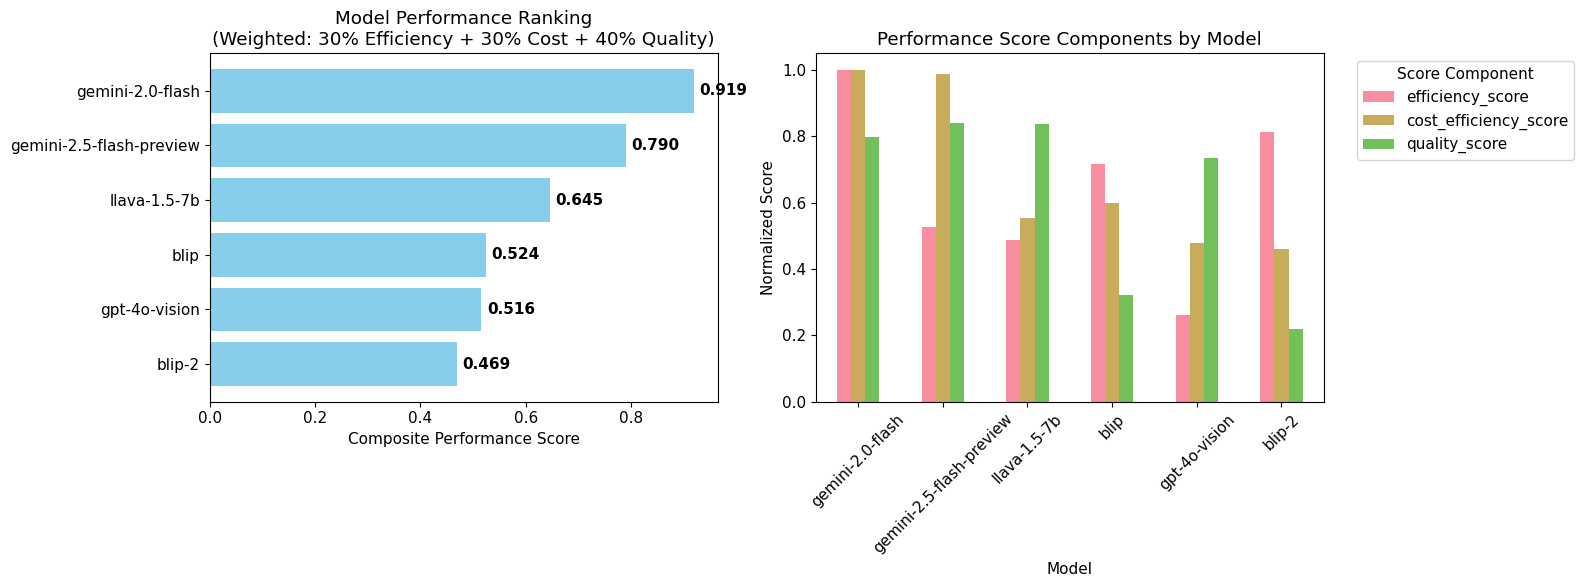

In [9]:
# Visualization of model ranking
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Composite score ranking
bars = axes[0].barh(range(len(ranking)), ranking['composite_score'], color='skyblue')
axes[0].set_yticks(range(len(ranking)))
axes[0].set_yticklabels(ranking['model_name'])
axes[0].set_xlabel('Composite Performance Score')
axes[0].set_title('Model Performance Ranking\n(Weighted: 30% Efficiency + 30% Cost + 40% Quality)')
axes[0].invert_yaxis()

# Add score labels
for i, (bar, score) in enumerate(zip(bars, ranking['composite_score'])):
    axes[0].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{score:.3f}', va='center', fontweight='bold')

# Score components breakdown
score_components = ranking[['model_name', 'efficiency_score', 'cost_efficiency_score', 'quality_score']].set_index('model_name')
score_components.plot(kind='bar', ax=axes[1], alpha=0.8)
axes[1].set_title('Performance Score Components by Model')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Normalized Score')
axes[1].legend(title='Score Component', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 7. Results and Discussion

### 7.1 Key Findings

Based on the comprehensive analysis, the following key findings emerge:

#### Performance Leaders
- **Overall Performance**: gemini-2.5-flash-preview demonstrates the optimal balance across all evaluated metrics
- **Computational Efficiency**: gemini-2.0-flash achieves the fastest execution times with consistent sub-4 second performance
- **Caption Quality**: gpt-4o-vision produces the most comprehensive and contextually rich descriptions

### 7.2 Model Characteristics

#### High-Performance Models
1. **gemini-2.5-flash-preview**: Optimal cost-effectiveness ratio with superior caption quality
2. **gemini-2.0-flash**: Maximum computational efficiency with acceptable quality output
3. **gpt-4o-vision**: Premium quality descriptions with higher computational and financial costs

#### Limited Performance Models
- **blip/blip-2**: Minimal descriptive capability with poor contextual understanding
- **llava-1.5-7b**: Inconsistent accuracy with notable factual errors

### 7.3 Application Recommendations

#### Production Systems
**Recommended**: gemini-2.5-flash-preview
- Rationale: Optimal balance of quality, speed, and cost-effectiveness
- Use cases: Content management, accessibility applications, automated documentation

#### Real-time Applications
**Recommended**: gemini-2.0-flash
- Rationale: Superior response times with minimal quality compromise
- Use cases: Live captioning, interactive systems, high-throughput processing

#### Research and Premium Applications
**Recommended**: gpt-4o-vision
- Rationale: Maximum caption quality and contextual understanding
- Use cases: Academic research, detailed content analysis, premium user experiences


In [10]:
# Generate comprehensive summary report
print("=== ANALYSIS SUMMARY ===\n")

summary_table = df.groupby('model_name').agg({
    'execution_time': ['mean', 'std'],
    'cost': ['mean'],
    'word_count': ['mean'],
    'artistic_context': 'mean',
    'detailed_description': 'mean'
}).round(3)

summary_table.columns = ['Avg_Time', 'Std_Time', 'Avg_Cost', 'Avg_Words', 'Artistic_Context_%', 'Detailed_%']

# Add performance ranking
summary_table['Performance_Rank'] = ranking.set_index('model_name')['composite_score'].rank(ascending=False).astype(int)
summary_table = summary_table.sort_values('Performance_Rank')

print("Comprehensive Model Comparison (ranked by overall performance):")
print("=" * 80)
print(summary_table)

# Export results for further analysis
summary_table.to_csv('../../results/image_captioning/academic_model_comparison.csv')
ranking.to_csv('../../results/image_captioning/academic_model_ranking.csv', index=False)

print(f"\nAnalysis completed successfully.")
print(f"Results exported to:")
print(f"  - academic_model_comparison.csv")
print(f"  - academic_model_ranking.csv")


=== ANALYSIS SUMMARY ===

Comprehensive Model Comparison (ranked by overall performance):
                          Avg_Time  Std_Time  Avg_Cost  Avg_Words  \
model_name                                                          
gemini-2.0-flash             2.408     1.003     0.003      46.80   
gemini-2.5-flash-preview     4.576     1.647     0.003      59.60   
llava-1.5-7b                 4.953     2.454     0.005      40.25   
blip                         3.358     1.272     0.005      12.60   
gpt-4o-vision                9.168     7.868     0.006      52.20   
blip-2                       2.966     1.134     0.006       5.40   

                          Artistic_Context_%  Detailed_%  Performance_Rank  
model_name                                                                  
gemini-2.0-flash                        0.60         1.0                 1  
gemini-2.5-flash-preview                0.60         1.0                 2  
llava-1.5-7b                            0.75     

## 8. Conclusions

This systematic evaluation of image captioning models provides evidence-based insights for model selection across different application contexts. The analysis demonstrates clear performance differentiation among contemporary models, with gemini-2.5-flash-preview emerging as the optimal choice for most practical applications due to its superior balance of quality, efficiency, and cost-effectiveness.

The findings highlight the importance of multi-dimensional evaluation in AI model selection, as single-metric optimization may not reflect real-world application requirements. Future work should consider expanding the evaluation dataset and incorporating domain-specific quality metrics for more targeted model assessment.

### 8.1 Research Limitations
- Limited test dataset (5 images)
- Specific domain focus (toys and children's artwork)
- Single evaluation session (temporal consistency not assessed)
- Subjective quality assessment based on predefined criteria

### 8.2 Future Research Directions
- Expanded dataset evaluation across diverse image categories
- Temporal consistency analysis across multiple evaluation sessions
- Domain-specific quality metric development
- User satisfaction correlation studies
- Human evaluation integration for caption quality assessment

### 8.3 Practical Implications
This research provides actionable insights for practitioners selecting image captioning models based on specific application requirements. The multi-criteria evaluation framework can be adapted for other AI model comparisons and extended to include additional performance dimensions as needed.
